## Prediction analysis

In [1]:
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
import scipy
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
from IPython.display import Image 
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import json
from web3 import Web3

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

In [2]:
path = os.getcwd()

## Importing the dataset

In [3]:
dataframe = pd.read_csv(path + '/Most-Recent-Cohorts-All-Data-Elements.csv', low_memory=False)

In [4]:
dataframe.head(1)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,UGDS_AIANOLD,UGDS_HISPOLD,UG_NRA,UG_UNKN,UG_WHITENH,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,PPTUG_EF,PPTUG_EF2,CURROPER,NPT4_PUB,NPT4_PRIV,NPT4_PROG,NPT4_OTHER,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT41_PROG,NPT42_PROG,NPT43_PROG,NPT44_PROG,NPT45_PROG,NPT41_OTHER,NPT42_OTHER,NPT43_OTHER,NPT44_OTHER,NPT45_OTHER,NPT4_048_PUB,NPT4_048_PRIV,NPT4_048_PROG,NPT4_048_OTHER,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NPT4_3075_PROG,NPT4_3075_OTHER,NPT4_75UP_PROG,NPT4_75UP_OTHER,NUM4_PUB,NUM4_PRIV,NUM4_PROG,NUM4_OTHER,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,NUM41_PROG,NUM42_PROG,NUM43_PROG,NUM44_PROG,NUM45_PROG,NUM41_OTHER,NUM42_OTHER,NUM43_OTHER,NUM44_OTHER,NUM45_OTHER,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,C150_4,C150_L4,C150_4_POOLED,C150_L4_POOLED,POOLYRS,PFTFTUG1_EF,D150_4,D150_L4,D150_4_POOLED

## Choose the features that we need for our analysis 

In [5]:
dataframe = dataframe[['CDR3','INSTNM','SAT_AVG','C150_4', 'C150_L4','COMPL_RPY_3YR_RT', 'NONCOM_RPY_3YR_RT',
                       'GRAD_DEBT_MDN', 'PCTFLOAN', 'MD_EARN_WNE_P8','MEDIAN_HH_INC','COUNT_WNE_INC1_P10', 
                       'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10','ICLEVEL', 'UGDS', 'CONTROL', 'COSTT4_A', 
                       'COSTT4_P', 'HIGHDEG']]  

## Split into train and test sets before the pre-processing

In [6]:
# For the test set, we choose rows with null values in our target variable (CDR3)
df = dataframe[dataframe['CDR3'].notnull()]
test = dataframe[dataframe.CDR3.isnull()]
print(df.shape)
print(test.shape)

(5879, 20)
(927, 20)


## Preprocessing

In [7]:
#Mix rows in the training set
df = df.sample(frac=1, random_state=1)

In [8]:
df.shape

(5879, 20)

In [9]:
df.head(3)

,CDR3,INSTNM,SAT_AVG,C150_4,C150_L4,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,ICLEVEL,UGDS,CONTROL,COSTT4_A,COSTT4_P,HIGHDEG
5836,0.072,California Technical Academy,NaN,NaN,0.8750,PrivacySuppressed,PrivacySuppressed,7568,0.1286,NaN,NaN,NaN,NaN,NaN,3,778.0,3,NaN,22280.0,1
4926,0.254,Florida Academy of Health & Beauty,NaN,NaN,0.8750,PrivacySuppressed,PrivacySuppressed,5500,0.5085,PrivacySuppressed,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3,43.0,3,NaN,18048.0,1
1501,0.066,Lowell Academy Hairstyling Institute,NaN,NaN,0.5918,0.4347826087,0.2666666667,7433,0.9024,20600,76078.56,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3,95.0,3,NaN,18184.0,1


In [10]:
print(df.info(verbose=True))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5879 entries, 5836 to 5775
Data columns (total 20 columns):
CDR3                  5879 non-null float64
INSTNM                5879 non-null object
SAT_AVG               1280 non-null float64
C150_4                2166 non-null float64
C150_L4               2713 non-null float64
COMPL_RPY_3YR_RT      5568 non-null object
NONCOM_RPY_3YR_RT     5568 non-null object
GRAD_DEBT_MDN         5749 non-null object
PCTFLOAN              5157 non-null float64
MD_EARN_WNE_P8        5009 non-null object
MEDIAN_HH_INC         4290 non-null object
COUNT_WNE_INC1_P10    5009 non-null object
COUNT_WNE_INC2_P10    5009 non-null object
COUNT_WNE_INC3_P10    5009 non-null object
ICLEVEL               5879 non-null int64
UGDS                  5171 non-null float64
CONTROL               5879 non-null int64
COSTT4_A              3148 non-null float64
COSTT4_P              1716 non-null float64
HIGHDEG               5879 non-null int64
dtypes: float64(8), int64

In [11]:
#Check missing values
print(df.isnull().sum())

CDR3                     0
INSTNM                   0
SAT_AVG               4599
C150_4                3713
C150_L4               3166
COMPL_RPY_3YR_RT       311
NONCOM_RPY_3YR_RT      311
GRAD_DEBT_MDN          130
PCTFLOAN               722
MD_EARN_WNE_P8         870
MEDIAN_HH_INC         1589
COUNT_WNE_INC1_P10     870
COUNT_WNE_INC2_P10     870
COUNT_WNE_INC3_P10     870
ICLEVEL                  0
UGDS                   708
CONTROL                  0
COSTT4_A              2731
COSTT4_P              4163
HIGHDEG                  0
dtype: int64


Some numeric columns are classified as object because they contained some 'PrivacySuppressed' data and/or null values. The presence of these values hinders the predictive ability of our features. We can either opt for removing the entire rows containing such data or converting these values into NA and then imputing them using different methods. We will opt for the first option in case of 'PrivacySuppressed' data because the might be non-random missing data; while in case of null values, we will impute them later.

In [12]:
#train --> delete rows with 'PrivacySuppressed' data
print(len(df[df['GRAD_DEBT_MDN'] == "PrivacySuppressed"]))
print(len(df[df['COMPL_RPY_3YR_RT'] == "PrivacySuppressed"]))
print(len(df[df['MD_EARN_WNE_P8'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC1_P10'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC2_P10'] == "PrivacySuppressed"]))
print(len(df[df['COUNT_WNE_INC3_P10'] == "PrivacySuppressed"]))
print(len(df[df['MEDIAN_HH_INC'] == "PrivacySuppressed"]))
df = df[(df['GRAD_DEBT_MDN'] != "PrivacySuppressed") ]
df = df[(df['COMPL_RPY_3YR_RT'] != 'PrivacySuppressed')]
df = df[df['MD_EARN_WNE_P8'] != 'PrivacySuppressed']
df = df[df['COUNT_WNE_INC1_P10'] != 'PrivacySuppressed']
df = df[df['COUNT_WNE_INC3_P10'] != 'PrivacySuppressed']
df = df[df['COUNT_WNE_INC2_P10'] != 'PrivacySuppressed']
df = df[df['MEDIAN_HH_INC'] != 'PrivacySuppressed']
print(df.shape)

603
992
498
890
1534
1547
78
(3786, 20)


In [13]:
#test --> delete rows with 'PrivacySuppressed' data
print(len(test[test['GRAD_DEBT_MDN'] == "PrivacySuppressed"]))
print(len(test[test['COMPL_RPY_3YR_RT'] == "PrivacySuppressed"]))
print(len(test[test['MD_EARN_WNE_P8'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC1_P10'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC2_P10'] == "PrivacySuppressed"]))
print(len(test[test['COUNT_WNE_INC3_P10'] == "PrivacySuppressed"]))
print(len(test[test['MEDIAN_HH_INC'] == "PrivacySuppressed"]))
test = test[(test['GRAD_DEBT_MDN'] != "PrivacySuppressed") ]
test = test[(test['COMPL_RPY_3YR_RT'] != 'PrivacySuppressed')]
test = test[test['MD_EARN_WNE_P8'] != 'PrivacySuppressed']
test = test[test['COUNT_WNE_INC1_P10'] != 'PrivacySuppressed']
test = test[test['COUNT_WNE_INC3_P10'] != 'PrivacySuppressed']
test = test[test['COUNT_WNE_INC2_P10'] != 'PrivacySuppressed']
test = test[test['MEDIAN_HH_INC'] != 'PrivacySuppressed']
print(test.shape)

639
48
127
234
467
467
10
(251, 20)


## Convert all the columns classified as object into numeric columns (float values)

In [14]:
#train
df['COMPL_RPY_3YR_RT'] = df['COMPL_RPY_3YR_RT'].astype(str).astype(float)
df['NONCOM_RPY_3YR_RT'] = df['NONCOM_RPY_3YR_RT'].astype(str).astype(float)
df['GRAD_DEBT_MDN'] = df['GRAD_DEBT_MDN'].astype(str).astype(float)
df['MD_EARN_WNE_P8'] = df['MD_EARN_WNE_P8'].astype(str).astype(float)
df['COUNT_WNE_INC1_P10'] = df['COUNT_WNE_INC1_P10'].astype(str).astype(float)
df['COUNT_WNE_INC2_P10'] = df['COUNT_WNE_INC2_P10'].astype(str).astype(float)
df['COUNT_WNE_INC3_P10'] = df['COUNT_WNE_INC3_P10'].astype(str).astype(float)
df['MEDIAN_HH_INC'] = df['MEDIAN_HH_INC'].astype(str).astype(float)

In [15]:
#test
test['COMPL_RPY_3YR_RT'] = test['COMPL_RPY_3YR_RT'].astype(str).astype(float)
test['NONCOM_RPY_3YR_RT'] = test['NONCOM_RPY_3YR_RT'].astype(str).astype(float)
test['GRAD_DEBT_MDN'] = test['GRAD_DEBT_MDN'].astype(str).astype(float)
test['MD_EARN_WNE_P8'] = test['MD_EARN_WNE_P8'].astype(str).astype(float)
test['COUNT_WNE_INC1_P10'] = test['COUNT_WNE_INC1_P10'].astype(str).astype(float)
test['COUNT_WNE_INC2_P10'] = test['COUNT_WNE_INC2_P10'].astype(str).astype(float)
test['COUNT_WNE_INC3_P10'] = test['COUNT_WNE_INC3_P10'].astype(str).astype(float)
test['MEDIAN_HH_INC'] = test['MEDIAN_HH_INC'].astype(str).astype(float)

In [16]:
df.describe()

,CDR3,SAT_AVG,C150_4,C150_L4,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,ICLEVEL,UGDS,CONTROL,COSTT4_A,COSTT4_P,HIGHDEG
count,3786.000000,1212.000000,1881.000000,1314.000000,3598.000000,3598.000000,3668.000000,3352.000000,3334.000000,2906.000000,3334.000000,3334.000000,3334.000000,3786.000000,3357.000000,3786.000000,2544.000000,665.000000,3786.000000
mean,0.104838,1139.191419,0.513737,0.497277,0.601202,0.399106,18338.647492,0.518199,35238.602280,60959.016721,1095.669466,987.862028,716.612178,1.516112,3949.364015,1.928685,29316.481525,22881.497744,2.570523
std,0.066453,121.302434,0.204704,0.231314,0.175852,0.167664,7942.603701,0.229910,10931.287475,11339.403497,2633.030373,3321.010119,2046.403210,0.708789,7000.575104,0.812509,16181.685883,5271.718463,1.400667
min,0.000000,785.000000,0.000000,0.000000,0.090517,0.092624,2334.000000,0.000000,15500.000000,17277.840000,26.000000,25.000000,25.000000,1.000000,0.000000,1.000000,6419.000000,8742.000000,0.000000
25%,0.050000,1059.000000,0.369100,0.287500,0.461898,0.252735,10664.000000,0.354875,28000.000000,52801.310000,163.000000,162.000000,81.000000,1.000000,396.000000,1.000000,15661.500000,19084.000000,2.000000
50%,0.097000,1123.500000,0.517800,0.488700,0.609965,0.389831,19500.000000,0.553000,33700.000000,60216.425000,444.000000,331.000000,220.000000,1.000000,1383.000000,2.000000,24918.500000,22223.000000,3.000000
75%,0.147000,1197.250000,0.655600,0.697975,0.743333,0.526176,25000.000000,0.692075,40200.000000,68625.572500,1096.500000,799.000000,567.500000,2.000000,4117.000000,3.000000,39971.500000,26645.000000,4.000000
max,0.595000,1545.000000,1.000000,1.000000,0.970646,0.906863,46212.000000,1.000000,125900.000000,98890.710000,30518.000000,41362.000000,22844.000000,3.000000,88921.000000,3.000000,75735.000000,41275.000000,4.000000


In [17]:
numeric_cols = ['SAT_AVG', 'C150_4', 'C150_L4', 'PCTFLOAN', 'UGDS', 'COSTT4_A', 'COSTT4_P','COMPL_RPY_3YR_RT', 
                'NONCOM_RPY_3YR_RT','GRAD_DEBT_MDN', 'MD_EARN_WNE_P8', 'MEDIAN_HH_INC',
            'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10'] 
discrete_cols = ['INSTNM','ICLEVEL', 'CONTROL', 'HIGHDEG']

## Scatter plots for numerical variables

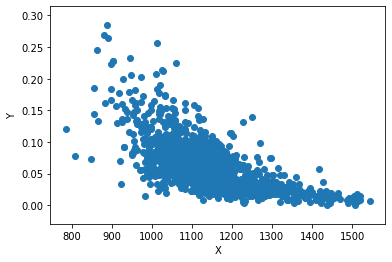

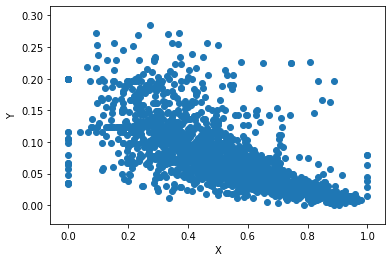

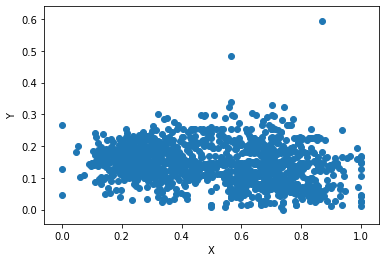

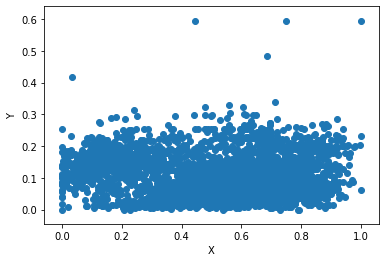

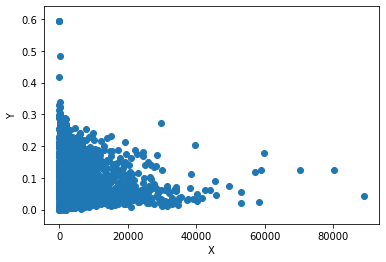

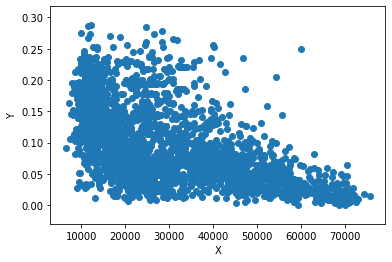

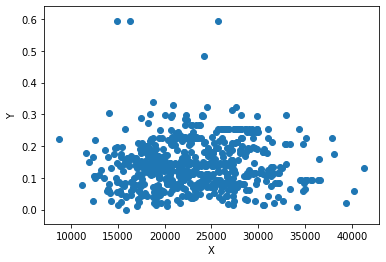

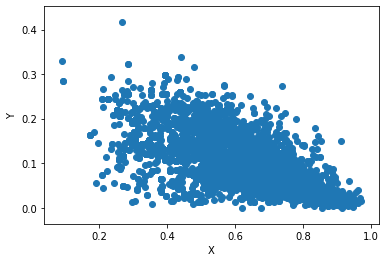

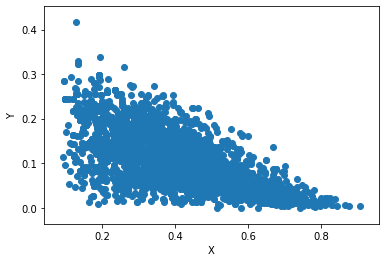

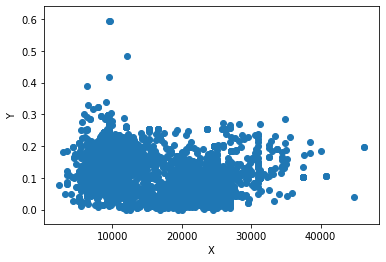

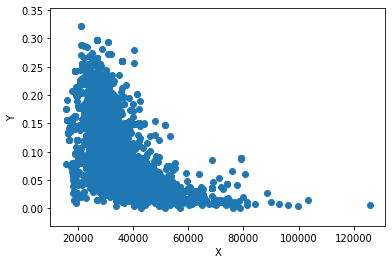

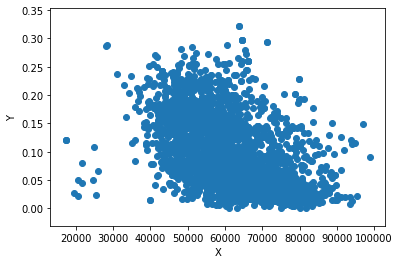

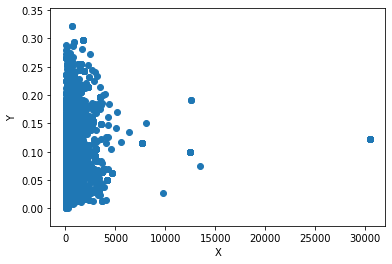

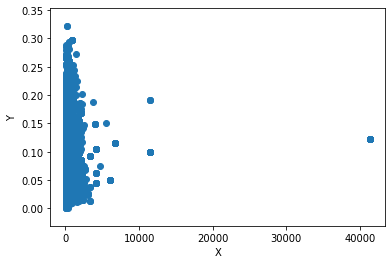

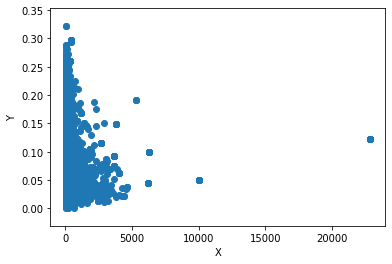

In [18]:
for i in df[numeric_cols]:
    plt.scatter(df[i].tolist(), df.CDR3.tolist())
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
## NB: presence of outliers

## COSTT4_A and COSTT4_P

We will operate on COSTA and COSTP. From the data dictionary, COSTT4_A and COSTT4_P are the average costs of attendance for academic-year institutions and program-year institutions respectively. There are too many missing values and, some of them must be non-random NA values. This is because only the academic-year institutions will have a value for COSTT4_A feature and NULL for the rest and vice-versa. We can go ahead and engineer a common feature representing the cost of attendance irrespective of whether the institute is an academic-year based or program-year.

In [19]:
#train set
df['COSTT4_A'][df['COSTT4_A'].isnull() & df['COSTT4_P'].notnull()] = 0
df['COSTT4_P'][df['COSTT4_P'].isnull() & df['COSTT4_A'].notnull()] = 0
# now create a feature for the cost of attendance
df['COST'] = df['COSTT4_A'] + df['COSTT4_P']
df.drop(["COSTT4_A"], axis=1, inplace=True)
df.drop(["COSTT4_P"], axis=1, inplace=True)

#test set
test['COSTT4_A'][test['COSTT4_A'].isnull() & test['COSTT4_P'].notnull()] = 0
test['COSTT4_P'][test['COSTT4_P'].isnull() & test['COSTT4_A'].notnull()] = 0
# now create a feature for the cost of attendance
test['COST'] = test['COSTT4_A'] + test['COSTT4_P']
test.drop(["COSTT4_A"], axis=1, inplace=True)
test.drop(["COSTT4_P"], axis=1, inplace=True)

C:\Users\Nic_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nic_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nic_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nic_m

We again will operate on C150_4 and C150_L4. From the data dictionary, C150_4 and C150_L4 are the proportion of full-time, first-time, degree/certificate-seeking undergraduates who completed a degree or certificate at the institution within 150 percent of normal time for 4-year institutions and less-than-4-year institutions respectively. There are too many missing values and as obvious, some of them must be non-random NA values. This is because only the 4-year institutions will have a value for C150 feature and NULL for the rest and vice-versa. We again can go ahead and engineer a common feature representing the the proportion of undergraduates who completed a degree within 150 percent irrespective of whether the institute is a 4-year institution or a less-than-4-year one.

In [20]:
#train set
df['C150_4'][df['C150_4'].isnull() & df['C150_L4'].notnull()] = 0
df['C150_L4'][df['C150_L4'].isnull() & df['C150_4'].notnull()] = 0
# now create a feature for the cost of attendance
df['C150'] = df['C150_L4'] + df['C150_4']
df.drop(["C150_L4"], axis=1, inplace=True)
df.drop(["C150_4"], axis=1, inplace=True)

#test set
test['C150_4'][test['C150_4'].isnull() & test['C150_L4'].notnull()] = 0
test['C150_L4'][test['C150_L4'].isnull() & test['C150_4'].notnull()] = 0
# now create a feature for the cost of attendance
test['C150'] = test['C150_L4'] + test['C150_4']
test.drop(["C150_L4"], axis=1, inplace=True)
test.drop(["C150_4"], axis=1, inplace=True)

C:\Users\Nic_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nic_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nic_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nic_m

## Feature selection

We want to know if all or any categorical variables are significant for our regression problem, we therefore perform an ANOVA test on such variables, which must be done without missing values, so we will create a dataset (data) without missing values by deleting all missing values just for this test.

In [21]:
data = df.dropna() 

#ICLEVEL
a = data["CDR3"].loc[data['ICLEVEL'] == 1]
b = data["CDR3"].loc[data['ICLEVEL'] == 2]
c = data["CDR3"].loc[data['ICLEVEL'] == 3]

t,pval = stats.f_oneway(a,b)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("ICLEVEL", ', ', t, ', ', pval, ', ', j)

#CONTROL
a = data["CDR3"].loc[data['CONTROL'] == 1]
b = data["CDR3"].loc[data['CONTROL'] == 2]
c = data["CDR3"].loc[data['CONTROL'] == 3]

t,pval = stats.f_oneway(a,b,c)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("CONTROL", ', ', t, ', ', pval, ', ', j)

#HIGHDEG
a = data["CDR3"].loc[data['HIGHDEG'] == 1]
b = data["CDR3"].loc[data['HIGHDEG'] == 2]
c = data["CDR3"].loc[data['HIGHDEG'] == 3]
d = data["CDR3"].loc[data['HIGHDEG'] == 4]

t,pval = stats.f_oneway(a,b,c,d)
if pval < 0.025:
    j = 'SIGNIFICANT'
else:
    j = 'INSIGNIFICANT'
print("HIGHDEG", ', ', t, ', ', pval, ', ', j)

ICLEVEL ,  27.820491185861652 ,  1.5810175924266726e-07 ,  SIGNIFICANT
CONTROL ,  8.263438937837178 ,  0.000272916358946998 ,  SIGNIFICANT
HIGHDEG ,  21.024875947297634 ,  2.840998556916733e-13 ,  SIGNIFICANT


## Correlation matrix for continuous variables

We want to know whether some of our continous variables convey similar information. We therefore plot a correlation matrix between such variables, we can see that the continous variables in the dataset are mostly uncorrelated. Except for the varibles relating to income after study, where successful universities, in this regard, have more employed students across all the income brackets.

In [22]:
numeric_cols = ['SAT_AVG', 'C150', 'PCTFLOAN', 'UGDS', 'COST', 'COMPL_RPY_3YR_RT', 'NONCOM_RPY_3YR_RT',
                'GRAD_DEBT_MDN', 'MD_EARN_WNE_P8', 'MEDIAN_HH_INC',
            'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC3_P10'] 

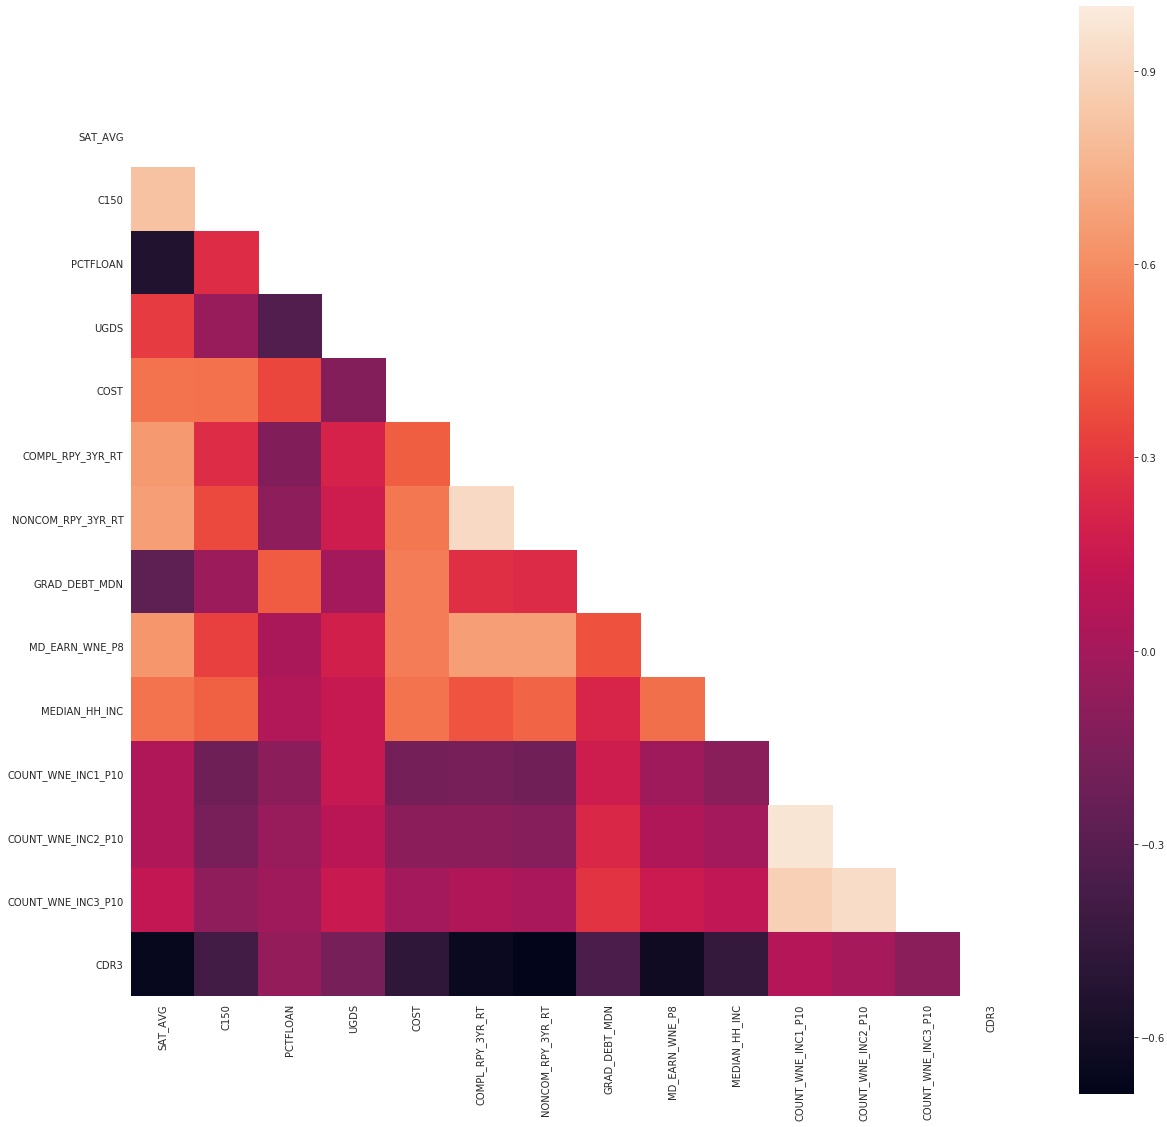

In [23]:
corrMatrix = df[numeric_cols+['CDR3']].corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corrMatrix, mask=mask,square=True) 

## One hot encoding for categorical variables

Since some models do not work with categorical variables we will transform them with one hot encoding

In [24]:
print(pd.unique(df['CONTROL'].values.ravel()))
print(pd.unique(df['ICLEVEL'].values.ravel()))
print(pd.unique(df['HIGHDEG'].values.ravel()))

[2 1 3]
[1 3 2]
[3 2 1 4 0]


In [25]:
#train set
if 'CONTROL' in df.columns:
    hot1df = pd.get_dummies(df.CONTROL, prefix='CONTROL', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["CONTROL"], axis=1, inplace=True)
if 'ICLEVEL' in df.columns:
    hot1df = pd.get_dummies(df.ICLEVEL, prefix='ICLEVEL', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["ICLEVEL"], axis=1, inplace=True)
if 'HIGHDEG' in df.columns:
    hot1df = pd.get_dummies(df.HIGHDEG, prefix='HIGHDEG', drop_first=True)
    df = pd.concat([df, hot1df], axis=1)
    df.drop(["HIGHDEG"], axis=1, inplace=True)
    
#test set
if 'CONTROL' in test.columns:
    hot1df = pd.get_dummies(test.CONTROL, prefix='CONTROL', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["CONTROL"], axis=1, inplace=True)
if 'ICLEVEL' in test.columns:
    hot1df = pd.get_dummies(test.ICLEVEL, prefix='ICLEVEL', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["ICLEVEL"], axis=1, inplace=True)
if 'HIGHDEG' in test.columns:
    hot1df = pd.get_dummies(test.HIGHDEG, prefix='HIGHDEG', drop_first=True)
    test = pd.concat([test, hot1df], axis=1)
    test.drop(["HIGHDEG"], axis=1, inplace=True)

In [26]:
df.head(1)

,CDR3,INSTNM,SAT_AVG,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.027,Ringling College of Art and Design,NaN,0.706989,0.553922,27000.0,0.6078,33800.0,70285.4,97.0,112.0,166.0,1559.0,64554.0,0.7152,1,0,0,0,0,0,1,0


In [27]:
test.head(1)

,CDR3,INSTNM,SAT_AVG,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
25,NaN,J F Ingram State Technical College,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,443.0,5580.0,0.5,0,0,1,0,1,0,0,0


In [28]:
#Delete duplicates (some colleges are presented more than once)
df.drop_duplicates('INSTNM', inplace=True)
df.shape

(3737, 23)

In [29]:
test.shape

(251, 23)

## Delete rows with more than 5 missing values
Since many rows contains a lot of missing values we chose a threshold (5) in order to keep only rows with few missing values

In [30]:
# I delete this feature since more than half of the rows present null values
df = df.drop('SAT_AVG', axis = 1)
test = test.drop('SAT_AVG', axis = 1)

In [31]:
# Delete rows with more than 5 missing values
df = df[df.isnull().sum(axis=1) < 5]
df.shape

(3138, 22)

## Imputing missing values

We will impute missing values with Iterative Imputer: it is a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. This approach involves defining a model to predict each missing feature as a function of all other features and to repeat this process of estimating feature values multiple times. The repetition allows the refined estimated values for other features to be used as input in subsequent iterations. Indeed, it is a regression problem where each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

In [32]:
df.isnull().sum()

CDR3                    0
INSTNM                  0
COMPL_RPY_3YR_RT        3
NONCOM_RPY_3YR_RT       3
GRAD_DEBT_MDN           4
PCTFLOAN               74
MD_EARN_WNE_P8          3
MEDIAN_HH_INC         269
COUNT_WNE_INC1_P10      3
COUNT_WNE_INC2_P10      3
COUNT_WNE_INC3_P10      3
UGDS                   75
COST                  193
C150                  166
CONTROL_2               0
CONTROL_3               0
ICLEVEL_2               0
ICLEVEL_3               0
HIGHDEG_1               0
HIGHDEG_2               0
HIGHDEG_3               0
HIGHDEG_4               0
dtype: int64

In [33]:
## Datasets with the name of the institutions --> we create it for the solidity part
df_inst = df.copy()
test_inst = test.copy()

In [34]:
name_train = df_inst['INSTNM']
name_test = test_inst['INSTNM']

In [35]:
df = df.drop('INSTNM', axis = 1)
test = test.drop('INSTNM', axis = 1)

In [36]:
imputer = IterativeImputer()
# fit on the train only (to avoid overfitting)
imputer.fit(df)
# transform the dataset
Xtrans = pd.DataFrame(imputer.transform(df))
Xtrans.columns = df.columns
Xtrans.index = df.index

C:\Users\Nic_m\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [37]:
#transform also the test set
TestTrans = pd.DataFrame(imputer.transform(test))
TestTrans.columns = test.columns
TestTrans.index = test.index

In [38]:
Xtrans_name = Xtrans.copy()
TestTrans_name = TestTrans.copy()

In [39]:
Xtrans_name['INSTNM'] = name_train
TestTrans_name['INSTNM'] = name_test

In [40]:
TestTrans_name = TestTrans_name.drop('CDR3', axis=1)

In [41]:
Xtrans_name.head(1)

,CDR3,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4,INSTNM
716,0.027,0.706989,0.553922,27000.0,0.6078,33800.0,70285.4,97.0,112.0,166.0,1559.0,64554.0,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Ringling College of Art and Design


In [42]:
TestTrans_name.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4,INSTNM
25,0.585753,0.356271,11896.094856,0.0,23618.092599,50290.886928,1394.644925,1176.775435,576.926562,443.0,5580.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,J F Ingram State Technical College


In [43]:
df_complete_x = pd.concat([Xtrans_name.drop('CDR3', axis=1), TestTrans_name])

In [44]:
df_complete_x.head()

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4,INSTNM
716,0.706989,0.553922,27000.0,0.6078,33800.0,70285.400000,97.0,112.0,166.0,1559.0,64554.0,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Ringling College of Art and Design
608,0.709677,0.475325,8900.0,0.1889,29500.0,60121.660000,391.0,278.0,81.0,12152.0,12990.0,0.1430,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Delaware Technical Community College-Terry
5669,0.583184,0.340741,9164.0,0.5468,24600.0,58210.471217,117.0,59.0,41.0,171.0,22848.0,0.6552,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Bellus Academy
2102,0.647727,0.395498,12592.0,0.2238,29600.0,56355.740000,471.0,478.0,257.0,2889.0,13602.0,0.2539,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Adirondack Community College
2694,0.847858,0.567976,23405.0,0.7241,37300.0,66586.040000,139.0,192.0,372.0,2117.0,37257.0,0.7691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Franciscan University of Steubenville


In [45]:
#uni_list created for later (used in the solidity part)
uni_list = []
for i in Xtrans_name['INSTNM']:
    uni_list.append(i)
for i in TestTrans_name['INSTNM']:
    uni_list.append(i)

In [46]:
print(Xtrans.isnull().sum())
print(TestTrans.isnull().sum())

CDR3                  0
COMPL_RPY_3YR_RT      0
NONCOM_RPY_3YR_RT     0
GRAD_DEBT_MDN         0
PCTFLOAN              0
MD_EARN_WNE_P8        0
MEDIAN_HH_INC         0
COUNT_WNE_INC1_P10    0
COUNT_WNE_INC2_P10    0
COUNT_WNE_INC3_P10    0
UGDS                  0
COST                  0
C150                  0
CONTROL_2             0
CONTROL_3             0
ICLEVEL_2             0
ICLEVEL_3             0
HIGHDEG_1             0
HIGHDEG_2             0
HIGHDEG_3             0
HIGHDEG_4             0
dtype: int64
CDR3                  0
COMPL_RPY_3YR_RT      0
NONCOM_RPY_3YR_RT     0
GRAD_DEBT_MDN         0
PCTFLOAN              0
MD_EARN_WNE_P8        0
MEDIAN_HH_INC         0
COUNT_WNE_INC1_P10    0
COUNT_WNE_INC2_P10    0
COUNT_WNE_INC3_P10    0
UGDS                  0
COST                  0
C150                  0
CONTROL_2             0
CONTROL_3             0
ICLEVEL_2             0
ICLEVEL_3             0
HIGHDEG_1             0
HIGHDEG_2             0
HIGHDEG_3             0
HIG

## Checking the distribution of the target variable

We want to check the distribution of the target variable since normality may influence the results of some of the models positively. For this reason, a function is applied to the target variable: we will use the squareroot transformation. Throughout the investigation, both the original and the transformed target variable will be used for the models in order to see which one performs better.

In [47]:
resp = df['CDR3']
stat, p = shapiro(resp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian --> fail to reject H0')
else:
    print('Sample does not look Gaussian --> reject H0')

Statistics=0.955, p=0.000
Sample does not look Gaussian --> reject H0


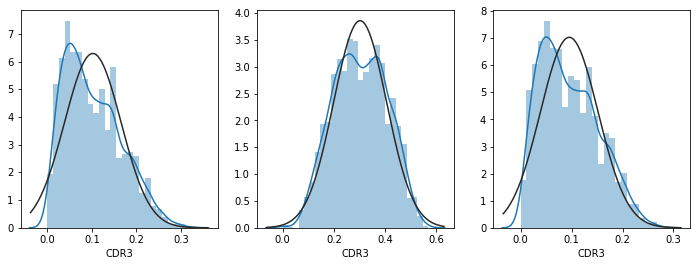

In [48]:
#Check the distribution of the target variable 
fig, ax = plt.subplots(1, 3)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)

sns.distplot(df['CDR3'], ax=ax[0], fit=norm)
sns.distplot(np.sqrt(df['CDR3']), ax=ax[1], fit= norm)
sns.distplot(np.log(df['CDR3']+1), ax=ax[2], fit= norm)
## With np.sqrt transformation it resembles a normal distribution

In [49]:
df_y = Xtrans['CDR3']
df_x = Xtrans.drop('CDR3', axis = 1)

#test_y = test['CDR3']
test_x = TestTrans.drop('CDR3', axis = 1)

We are going to make a copy of the data in order to be able to compare performance of models using both y and sqrt(y) and see which one performs better.

In [50]:
X_train = df_x.copy()
y_train = df_y.copy()
X_test = test_x.copy()

In [51]:
# sqrt transformation for target variable (compare models using both y and sqrt(y))
y_train_sqrt = y_train.copy()
y_train_sqrt = y_train_sqrt.apply(lambda x: np.sqrt(x))

## Standardization 

Application of standardization to the explanatory variables: given that the features were on different scales, as described above, it seemed like a good idea to transform these too.
We will make a copy of the data, so that later we can compare models with standardized data and raw data and see in which case they perform better.
We will standardize explanatory variables with ‘MinMaxScaler’, which scales each feature to a given range, in our case 0-1.

In [52]:
#MinMax Scaler
scaler = MinMaxScaler()
X_train_scal = df_x.copy()
X_test_scal = test_x.copy()

#fit on the train
scaler.fit(X_train_scal.iloc[:,:-8])

#transform both the train and the test
X_train_scal.iloc[:,:-8] = scaler.transform(X_train_scal.iloc[:,:-8])
X_test_scal.iloc[:,:-8] = scaler.transform(X_test_scal.iloc[:,:-8])

In [53]:
X_train_scal.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.669512,0.566538,0.56215,0.610793,0.165761,0.6495,0.002328,0.002105,0.029149,0.023418,0.876689,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Divide df and df_sclaed in train + dev 

Divide further the training set: train and evaluation sets in order to train our models on the train set and then check the performance on the evaluation set.
We will create train and evaluation sets first with raw data and then with the standardized ones.

In [54]:
N = len(df_x)
train_size = int(N*0.85)
dev_size = int(N*0.15)

#train
train_x = df_x[:train_size]
train_y_sqrt = y_train_sqrt[:train_size]

#eval
dev_x = df_x[train_size: train_size+dev_size]
dev_y_sqrt = y_train_sqrt[train_size: train_size+dev_size]

print(len(train_x), len(dev_x))

2667 470


In [55]:
train_x.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.706989,0.553922,27000.0,0.6078,33800.0,70285.4,97.0,112.0,166.0,1559.0,64554.0,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
print(train_x.shape)
print(dev_x.shape)

(2667, 20)
(470, 20)


In [57]:
N = len(df_x)
train_size = int(N*0.85)
dev_size = int(N*0.15)

train_x_s = X_train_scal[:train_size]
train_y = df_y[:train_size]
dev_x_s = X_train_scal[train_size: train_size+dev_size]
dev_y = df_y[train_size: train_size+dev_size]

print(len(train_x_s), len(dev_x_s))

2667 470


In [58]:
print(train_x_s.shape)
print(dev_x_s.shape)

(2667, 20)
(470, 20)


In [59]:
train_x_s.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4
716,0.669512,0.566538,0.56215,0.610793,0.165761,0.6495,0.002328,0.002105,0.029149,0.023418,0.876689,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
t = pd.DataFrame(train_y)
e = pd.DataFrame(dev_y)
t.to_csv('ActualValuesTrain.csv', index = False)
e.to_csv('ActualValuesEval.csv')

## Models

Having concluded the preprocessing of the data, the main part of the analysis starts here. This involved the application of different models, using all the various combinations of transformations of the input data and the target variable in each case, and the optimization of these models.
The optimization of the parameters will be carried out using GridSearchCV. This approach tests all possible combinations exhaustively using cross-validation, but this means that it requires a huge amount of computations. Because of this, especially given the number of potential parameters of the function, only a subset will be tested.

## Random forest 

1. Raw data and y

In [59]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x, train_y)
print("neg MAE score:", score)

neg MAE score: [-0.02320935 -0.02181358 -0.02066343]


In [60]:
predictions = rf.predict(dev_x)
# Calculate the absolute errors
errors = (abs(predictions - dev_y))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.02 degrees.


0.02112975531914894

2. Raw data and sqrt(y)

In [167]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x, train_y_sqrt)
print("neg MAE score:", score)

neg MAE score: [-0.03702803 -0.03468015 -0.03336864]


In [168]:
predictions = rf.predict(dev_x)
# Calculate the absolute errors
errors = (abs(predictions - dev_y_sqrt))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.03 degrees.


0.03443549829108089

3. Standardized data and y

In [169]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x_s, train_y)
print("neg MAE score:", score)

neg MAE score: [-0.02319457 -0.02182154 -0.0206523 ]


In [170]:
predictions = rf.predict(dev_x_s)
# Calculate the absolute errors
errors = (abs(predictions - dev_y))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.02 degrees.


0.0211033829787234

4. Standardized data and sqrt(y)

In [171]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")
score = cross_val_score(rf, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf.fit(train_x_s, train_y_sqrt)
print("neg MAE score:", score)

neg MAE score: [-0.03700976 -0.03470364 -0.03337713]


In [172]:
predictions = rf.predict(dev_x_s)
# Calculate the absolute errors
errors = (abs(predictions - dev_y_sqrt))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.03 degrees.


0.03445265816168211

Optimization with GridSearchCV of Random Forest with the data that had the best performance: 

In [161]:
rf = RandomForestRegressor(random_state = 1, n_jobs = -1, criterion = "mae")

min_samples_leaf_n = [1, 10, 20]
max_features_n = ['auto', 'sqrt']
n_estimators_n = [1000, 5000]

param_grid = [
    {'min_samples_leaf': min_samples_leaf_n,
     'max_features': max_features_n,
     'n_estimators': n_estimators_n,
    },
    ]

grid = GridSearchCV(rf, param_grid, cv = 3, scoring='neg_mean_absolute_error', n_jobs = -1)
grid.fit(train_x_s, train_y.values.ravel())

print(grid.best_params_)
print(grid.best_score_)

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 5000}
-0.02173784334458169


RandomForest with the optimal parameters found with GridSearchCV

In [61]:
rf_opt = RandomForestRegressor(random_state = 1, n_jobs = -1, max_features = 'auto', criterion = "mae", 
                               min_samples_leaf = 1, n_estimators = 5000)

score = cross_val_score(rf_opt, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
rf_opt.fit(train_x_s, train_y)
print("MAE score:", score)

MAE score: [-0.02287673 -0.02181082 -0.02052599]


In [62]:
predictions = rf_opt.predict(dev_x_s)
# Calculate the absolute errors
errors = (abs(predictions - dev_y))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.02 degrees.


0.02101217744680829

In [63]:
#Prediction on test set
prediction_test = rf_opt.predict(X_test)
#p = pd.DataFrame(prediction_test)
#p.to_csv('prediction_for_test_set.csv')

In [64]:
TestTrans_name['CDR3'] = prediction_test

In [65]:
Xtrans_name.head(1)

,CDR3,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4,INSTNM
716,0.027,0.706989,0.553922,27000.0,0.6078,33800.0,70285.4,97.0,112.0,166.0,1559.0,64554.0,0.7152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Ringling College of Art and Design


In [66]:
TestTrans_name.head(1)

,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,GRAD_DEBT_MDN,PCTFLOAN,MD_EARN_WNE_P8,MEDIAN_HH_INC,COUNT_WNE_INC1_P10,COUNT_WNE_INC2_P10,COUNT_WNE_INC3_P10,UGDS,COST,C150,CONTROL_2,CONTROL_3,ICLEVEL_2,ICLEVEL_3,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,HIGHDEG_4,INSTNM,CDR3
25,0.585753,0.356271,11896.094856,0.0,23618.092599,50290.886928,1394.644925,1176.775435,576.926562,443.0,5580.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,J F Ingram State Technical College,0.068367


## Checking the robustness of our best model
Robustness testing analyzes the uncertainty of models and tests whether estimated effects of interest are sensitive to changes in model specifications. We will check the uncertainty of our model fitting our optimal model (the optimized Random Forest) on 50 different training set, found sampling N (= number of rows in the trai set) observations with replacement from the training set.

In [111]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []
num_simulations = 50
# Loop through many simulations
for i in range(num_simulations):
    
    df = train_x_s
    df['y'] = train_y

    train_simul_index = np.random.choice(df.index, size = df.shape[0], replace= True)
    train_simul = df.loc[train_simul_index]
    train_simul_y = train_simul['y']
    train_simul_x = train_simul.drop('y', axis = 1)
    rf_opt.fit(train_simul_x, train_simul_y)
    print("MAE score:", score)
    p = list(rf_opt.predict(dev_x_s))
    errors = (abs(predictions - dev_y))
    all_stats.append(p)


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


<ipython-input-111-dc16bcb30eea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = train_y


MAE score: [-0.02287673 -0.02181082 -0.02052599]


In [112]:
df_1 = pd.DataFrame(all_stats)
df_1['mean'] = df_1.mean(axis=0) 
df_1['std'] = df_1.std(axis=0) 
df_1['se'] = df_1['std']/np.sqrt(470)
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,mean,std,se
0,0.148485,0.143419,0.021595,0.171352,0.102694,0.151543,0.049655,0.049612,0.038214,0.065304,0.185833,0.092715,0.047796,0.123751,0.103685,0.122639,0.035993,0.140628,0.151437,0.038978,0.060051,0.176016,0.016626,0.195207,0.058695,0.058609,0.089739,0.067199,0.106690,0.025849,0.104836,0.156875,0.123478,0.146150,0.181041,0.117582,0.070351,0.132637,0.144734,0.118472,0.040962,0.159098,0.094750,0.087353,0.067004,0.024204,0.118499,0.128829,0.024709,0.098013,0.183159,0.097483,0.021677,0.132102,0.174934,0.077357,0.170685,0.099205,0.099070,0.040722,0.085016,0.089963,0.013651,0.025381,0.124880,0.124407,0.083557,0.155571,0.129009,0.033108,0.069960,0.070363,0.025704,0.138938,0.137219,0.153021,0.082078,0.174916,0.041063,0.055519,0.059279,0.088127,0.196682,0.144376,0.090386,0.124814,0.122974,0.041648,0.145790,0.147032,0.177602,0.105968,0.099935,0.071314,0.035343,0.182327,0.092965,0.163875,0.107071,0.027129,0.100007,0.087345,0.195967,0.049548,0.145898,0.078114,0.108204,0.075933,0.137871,0.067343,0.115779,0.193460,0.064005,0.145516,0.018425,0.155028,0.153654,0.096662,0.118523,0.055371,0.116174,0.019028,0.053539,0.023846,0.199160,0.039388,0.164249,0.140395,0.054236,0.073220,0.024856,0.012484,0.184687,0.208882,0.081075,0.173963,0.158454,0.105187,0.186333,0.037494,0.040850,0.099551,0.085016,0.116133,0.094082,0.033931,0.153222,0.143072,0.048294,0.177505,0.067155,0.166055,0.192417,0.071364,0.127536,0.106612,0.094762,0.144400,0.110945,0.117059,0.196758,0.171728,0.087969,0.145988,0.157428,0.152636,0.064269,0.168720,0.045544,0.036131,0.158137,0.135751,0.145011,0.140363,0.104891,0.112062,0.126136,0.134909,0.162541,0.079503,0.100728,0.092175,0.124243,0.221127,0.187425,0.067211,0.030650,0.116334,0.057086,0.099487,0.196034,0.085205,0.169443,0.143273,0.118826,0.031296,0.117100,0.105693,0.095539,0.170942,0.090046,0.122532,0.015564,0.062443,0.053612,0.123024,0.072239,0.098539,0.143724,0.023012,0.120147,0.071984,0.169854,0.019308,0.150727,0.161507,0.054733,0.159669,0.145065,0.049898,0.111621,0.079483,0.115202,0.076804,0.162280,0.033416,0.179219,0.129547,0.170027,0.095887,0.207451,0.127062,0.014281,0.123421,0.115979,0.121925,0.175439,0.107476,0.172618,0.128295,0.170254,0.051548,0.029489,0.062111,0.041191,0.152385,0

In [115]:
df_1['se'].mean()

0.00030255862070097816

In [113]:
df_1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,mean,std,se
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5

## Logistic regression

1. Raw data (not scaled) and y (not under sqrt)

In [173]:
logit = sm.Logit(train_y, train_x)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.169185
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                     inf
Time:                        00:02:09   Log-Likelihood:                -451.22
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT      -0.0143      1.013     -0.014      0.989      -1.999       1.970
NONCO

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [174]:
predictions = logitFit.predict(dev_x)
errors = abs(predictions - dev_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.03 degrees.


0.027640552545499467

2. Raw data (not scaled) and sqrt(y) 

In [175]:
logit = sm.Logit(train_y_sqrt, train_x)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.520216
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  -11.87
Time:                        00:02:18   Log-Likelihood:                -1387.4
converged:                       True   LL-Null:                       -107.84
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT       0.2925      0.673      0.435      0.664      -1.026       1.611
NONCO

In [176]:
predictions = logitFit.predict(dev_x)
errors = abs(predictions - dev_y_sqrt)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.04 degrees.


0.04271810493405506

3. Standardized data and y

In [177]:
logit = sm.Logit(train_y, train_x_s)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.169674
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                     inf
Time:                        00:02:27   Log-Likelihood:                -452.52
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT      -0.1402      0.811     -0.173      0.863      -1.730       1.450
NONCO

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [178]:
predictions = logitFit.predict(dev_x_s)
errors = abs(predictions - dev_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y, predictions)

Mean Absolute Error: 0.03 degrees.


0.028631990083314244

4. Standardized data and sqrt(y)

In [179]:
logit = sm.Logit(train_y_sqrt, train_x_s)
logitFit = logit.fit()
print(logitFit.summary())

Optimization terminated successfully.
         Current function value: 0.520206
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   CDR3   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  -11.86
Time:                        00:03:03   Log-Likelihood:                -1387.4
converged:                       True   LL-Null:                       -107.84
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
COMPL_RPY_3YR_RT       0.1464      0.544      0.269      0.788      -0.921       1.213
NONCO

In [180]:
predictions = logitFit.predict(dev_x_s)
errors = abs(predictions - dev_y_sqrt)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mean_absolute_error(dev_y_sqrt, predictions)

Mean Absolute Error: 0.04 degrees.


0.04275785386503357

## Boosting 

1. Raw data and y

In [181]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x, train_y)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [182]:
y_pred = regr_boost.predict(dev_x)
mean_absolute_error(dev_y, y_pred)

0.02196405861056608

2. Raw data and sqrt(y)

In [183]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x, train_y_sqrt)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [184]:
y_pred = regr_boost.predict(dev_x)
mean_absolute_error(dev_y_sqrt, y_pred)

0.035944280287903904

3. Standardized data and y

In [185]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x_s, train_y)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [186]:
y_pred = regr_boost.predict(dev_x_s)
mean_absolute_error(dev_y, y_pred)

0.021925214526719555

4. Standardized data and sqrt(y)

In [188]:
regr_boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, random_state=1)
regr_boost.fit(train_x_s, train_y_sqrt)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

In [189]:
y_pred = regr_boost.predict(dev_x_s)
mean_absolute_error(dev_y_sqrt, y_pred)

0.035964432955087805

## Support Vector Machine

1. Raw data and y

In [190]:
svm = SVR()

score = cross_val_score(svm, train_x, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04340454 -0.04283741 -0.04735329]


2. Raw data and sqrt(y)

In [191]:
svm = SVR()

score = cross_val_score(svm, train_x, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.05493583 -0.05286576 -0.05388723]


3. Standardized data and y

In [192]:
svm = SVR()

score = cross_val_score(svm, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04385779 -0.04740536 -0.04411674]


4. Standardized data and sqrt(y)

In [193]:
svm = SVR()

score = cross_val_score(svm, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04692697 -0.04842867 -0.04557003]


In [200]:
svm = SVR()

kernel_n = ['poly', 'rbf', 'sigmoid']
C_n = [0.1, 1.0, 10.0, 100.0, 1000.0]
shrinking_n = [True, False]

param_grid = [
    {'kernel': kernel_n,
     'C': C_n,
     'shrinking': shrinking_n
    },
    ]

grid = GridSearchCV(svm, param_grid, cv = 3, scoring='neg_mean_absolute_error', n_jobs = -1)
grid.fit(train_x_s, train_y_sqrt.values.ravel())

print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'kernel': 'rbf', 'shrinking': True}
-0.0466827078165048


In [204]:
svm_opt = SVR(C = 1.0, kernel = "rbf", shrinking = True)

score = cross_val_score(svm_opt, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.04692697 -0.04842867 -0.04557003]


## K-Nearest Neighbors

1. Raw data and y

In [196]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x, train_y, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.03060517 -0.03053431 -0.0288153 ]


2. Raw data and sqrt(y)

In [197]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.04886707 -0.04834251 -0.04695213]


3. Standardized data and y

In [198]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.02630574 -0.02619865 -0.02524229]


4. Standardized data and sqrt(y)

In [199]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

score = cross_val_score(knn, train_x_s, train_y_sqrt, cv=3, scoring="neg_mean_absolute_error")
print("MAE score:", score)

MAE score: [-0.04203573 -0.04135772 -0.04032619]


In [202]:
knn = KNeighborsRegressor(n_jobs=-1, algorithm='auto')

n_neighbors_n = [5, 10, 20, 30, 40]
weights_n = ["uniform", "distance"]
p_n = [1, 2]

param_grid = [
    {'n_neighbors': n_neighbors_n,
     'weights': weights_n,
     'p': p_n,
    },
    ]

grid = GridSearchCV(knn, param_grid, cv = 3, scoring='neg_mean_absolute_error')
grid.fit(train_x_s, train_y.values.ravel())

print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
-0.024198536827180733


In [203]:
knn_opt = KNeighborsRegressor(n_jobs=-1, algorithm='auto', n_neighbors = 5, p = 1, weights="distance")

score = cross_val_score(knn_opt, train_x_s, train_y, cv=3, scoring="neg_mean_absolute_error", n_jobs = -1)
print("MAE score:", score)

MAE score: [-0.0250409  -0.02429828 -0.02325644]


Among the various combinations and the different models that we tried, we achieved the best performance with Random Forest, using standardized features and raw y. 

# PRICING

## Interest rate
In order to link the 3-year default rate to an annual interest rate, we used the methodology from "Options, Futures, and Other Derivatives" by John C. Hull Chapter 24.4 "Estimating default probabilities from bond yield spreads".

We first determined a way to transform the 3-year default rate (the response variable in the analysis above) into an annualized default rate. To do so we defined the function "annualized_avg_default_rate".

Once obtained the annualized default rate, we determined the intereset rate as: (1 - recovery rate) * annual default rate + fixed interest rate swap level for the correspondent maturity.
We could not access data to average recovery rates on student loans and we assumed a constant level of 10% for all individuals. This is about half of the average recovery rate on junior subordinate bonds (source: "Options, Futures, and Other Derivatives" by John C. Hull Chapter 24.4). The difference is explained by the fact that corporations tend to have a higher asset base compared to the amount of debt and therefore higher coverage in case of default.

In [69]:
path = os.getcwd()

In [70]:
df1 = pd.read_csv(path + "/ActualValuesEval.csv")
df2 = pd.read_csv(path + "/ActualValuesTrain.csv")

In [71]:
df1.drop(df1.columns[0], inplace = True, axis = 1)
df_actual = pd.concat([df1, df2], axis = 0)
df_actual.rename({'CDR3':'default_rate_cum'}, inplace = True, axis = 1)

In [72]:
recovery_rate = 0.1 # assumption
mid_swap_US = 0.0048 # as of 07 December 2020

def annualized_avg_default_rate(default_rate):
    return - np.log(1 - default_rate) / 3

In [73]:
df_actual['default_rate_ann'] = annualized_avg_default_rate(df_actual['default_rate_cum'])
df_actual['interest_rate_ann'] = ((1 - recovery_rate) * df_actual['default_rate_ann'] + mid_swap_US) * 100
df_actual.head()

,default_rate_cum,default_rate_ann,interest_rate_ann
0,0.126,0.044892,4.520247
1,0.162,0.058912,5.782115
2,0.008,0.002677,0.720965
3,0.178,0.065338,6.360447
4,0.138,0.049500,4.935000


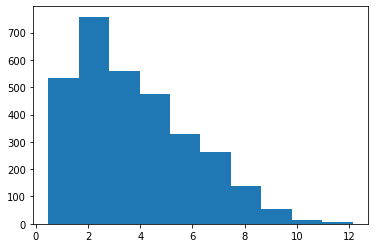

In [74]:
plt.hist(df_actual['interest_rate_ann'])
plt.show()

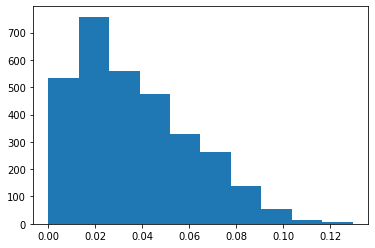

In [75]:
plt.hist(df_actual['default_rate_ann'])
plt.show()

## Analysis credit ratings

Below we propose two methods to determine the credit rating of a student. Both are based on the default rate. The first one defines the credit rating thresholds such that the amount of students in each bucket is constant. The second one defines 10 intervals such that the incremental default rate is constant. We opted for the second method as this methodology is less dependent on our dataset.

In [76]:
# by density

df_actual_sorted = df_actual.sort_values(by = 'default_rate_ann', axis = 0, ascending = True)

number_of_ratings = 10
rating_index_threshold = len(df_actual_sorted)//number_of_ratings

for threshold in range(1, number_of_ratings):
    print(df_actual_sorted.iloc[[rating_index_threshold * threshold]][['default_rate_ann']])

     default_rate_ann
775          0.009124
      default_rate_ann
2357          0.014651
     default_rate_ann
176          0.019563
     default_rate_ann
181          0.025267
     default_rate_ann
146          0.031437
      default_rate_ann
2574          0.039595
     default_rate_ann
935          0.048342
      default_rate_ann
1025          0.056534
     default_rate_ann
426          0.071891


In [77]:
# constant step

lower_bound_default_rate = df_actual_sorted.iloc[0]
upper_bound_default_rate = df_actual_sorted.iloc[-1]

incremental_step = (upper_bound_default_rate - lower_bound_default_rate) / number_of_ratings

for step in range(1,10):
    print(lower_bound_default_rate + incremental_step * step)


default_rate_cum     0.032200
default_rate_ann     0.012954
interest_rate_ann    1.645824
dtype: float64
default_rate_cum     0.064400
default_rate_ann     0.025907
interest_rate_ann    2.811648
dtype: float64
default_rate_cum     0.096600
default_rate_ann     0.038861
interest_rate_ann    3.977472
dtype: float64
default_rate_cum     0.128800
default_rate_ann     0.051814
interest_rate_ann    5.143296
dtype: float64
default_rate_cum     0.161000
default_rate_ann     0.064768
interest_rate_ann    6.309120
dtype: float64
default_rate_cum     0.193200
default_rate_ann     0.077722
interest_rate_ann    7.474944
dtype: float64
default_rate_cum     0.225400
default_rate_ann     0.090675
interest_rate_ann    8.640768
dtype: float64
default_rate_cum     0.257600
default_rate_ann     0.103629
interest_rate_ann    9.806592
dtype: float64
default_rate_cum      0.289800
default_rate_ann      0.116582
interest_rate_ann    10.972416
dtype: float64


In [78]:
def get_interest_rate(default_rate):
    mid_swap_US = 0.0048
    recovery_rate = 0.1
    annualized_avg_default_rate = - np.log(1 - default_rate) / 3
    i_r = ((1 - recovery_rate) * annualized_avg_default_rate + mid_swap_US)
    return i_r

In [79]:
credit_rating_thresholds = []

for step in range(1, 10):
    credit_rating_thresholds.append(incremental_step[0] * step)
    
    
def get_credit_rating(default_rate):
    if default_rate <= credit_rating_thresholds[0]:
        return "CR1"
    elif default_rate <= credit_rating_thresholds[1]:
        return "CR2"
    elif default_rate <= credit_rating_thresholds[2]:
        return "CR3"
    elif default_rate <= credit_rating_thresholds[3]:
        return "CR4"
    elif default_rate <= credit_rating_thresholds[4]:
        return "CR5"
    elif default_rate <= credit_rating_thresholds[5]:
        return "CR6"
    elif default_rate <= credit_rating_thresholds[6]:
        return "CR7"
    elif default_rate <= credit_rating_thresholds[7]:
        return "CR8"
    elif default_rate <= credit_rating_thresholds[8]:
        return "CR9"
    else:
        return "CR10"

## Interaction with the BlockChain

We now define a proof of concept which demostrates how the envisioned application would work. The Solidity contracts have to be deployed to the blockchain and there respective addresses stored in realative variables. The StuLoan contract will have only one deployed copy, while InvTokens will be many, one for each investment made. This is why later on we keep track of the deployed InvTokens within a list. We start by defining the chain URL and the two contracts ABI's. We then store the deployed contarcts' addresses.

In [79]:
ganache_url = 'HTTP://127.0.0.1:8545'
web3 = Web3(Web3.HTTPProvider(ganache_url))

Copy the ABI of both the StudentLoan and the InvestorToken contracts.

In [80]:
abiStuLoan = json.loads('''[
	{
		"stateMutability": "payable",
		"type": "fallback"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "applications",
		"outputs": [
			{
				"internalType": "bool",
				"name": "openApp",
				"type": "bool"
			},
			{
				"internalType": "uint256",
				"name": "applicationId",
				"type": "uint256"
			},
			{
				"internalType": "address",
				"name": "student",
				"type": "address"
			},
			{
				"internalType": "uint256",
				"name": "credit_amount",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "interest_rate",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "RiskRating",
				"type": "string"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "countLoans",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "interest_rate",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "credit_amount",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "RiskRating",
				"type": "string"
			}
		],
		"name": "createApplication",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "name",
				"type": "string"
			}
		],
		"name": "createInvestor",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "name",
				"type": "string"
			}
		],
		"name": "createStudent",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "deposit",
		"outputs": [],
		"stateMutability": "payable",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "findLoans",
		"outputs": [
			{
				"internalType": "uint256[]",
				"name": "",
				"type": "uint256[]"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "getApplicationData",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			},
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "getLoanData",
		"outputs": [
			{
				"internalType": "uint256[]",
				"name": "",
				"type": "uint256[]"
			},
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			},
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getNumApplications",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getNumLoans",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getTime",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "appId",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "amount",
				"type": "uint256"
			}
		],
		"name": "grantLoan",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "ifApplicationOpen",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "ifLoanOpen",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "invFindLoans",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"name": "investors",
		"outputs": [
			{
				"internalType": "address",
				"name": "investor_public_key",
				"type": "address"
			},
			{
				"internalType": "string",
				"name": "name",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "EXISTS",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "address",
				"name": "account",
				"type": "address"
			}
		],
		"name": "isInvestor",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "address",
				"name": "account",
				"type": "address"
			}
		],
		"name": "isStudent",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "loans",
		"outputs": [
			{
				"internalType": "bool",
				"name": "openLoan",
				"type": "bool"
			},
			{
				"internalType": "uint256",
				"name": "loanId",
				"type": "uint256"
			},
			{
				"internalType": "address",
				"name": "student",
				"type": "address"
			},
			{
				"internalType": "address",
				"name": "investor",
				"type": "address"
			},
			{
				"internalType": "uint256",
				"name": "interest_rate",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "principal_amount",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "original_amount",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "amount_paid",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "startTime",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "monthlyCheckpoint",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "appId",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "amount",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "estimatedInterest",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "timeSinceLastPayment",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "id_",
				"type": "uint256"
			}
		],
		"name": "repayLoan",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"name": "students",
		"outputs": [
			{
				"internalType": "address",
				"name": "student_public_key",
				"type": "address"
			},
			{
				"internalType": "string",
				"name": "name",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "EXISTS",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "viewBalance",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "amount",
				"type": "uint256"
			}
		],
		"name": "withdraw",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	}
]''')

In [81]:
abiInvToken = json.loads('''[
	{
		"inputs": [],
		"stateMutability": "nonpayable",
		"type": "constructor"
	},
	{
		"stateMutability": "payable",
		"type": "fallback"
	},
	{
		"inputs": [],
		"name": "buy",
		"outputs": [],
		"stateMutability": "payable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "name",
				"type": "string"
			}
		],
		"name": "createInvestor",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "depositToLoan",
		"outputs": [],
		"stateMutability": "payable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "getApplicationData",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			},
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getLoanData",
		"outputs": [
			{
				"internalType": "uint256[]",
				"name": "",
				"type": "uint256[]"
			},
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			},
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getNumApplications",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getTime",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "appId",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "amount",
				"type": "uint256"
			}
		],
		"name": "grantLoan",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "removeSale",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "askprice",
				"type": "uint256"
			}
		],
		"name": "sell",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "address payable",
				"name": "_address",
				"type": "address"
			}
		],
		"name": "stuLoanAddress",
		"outputs": [
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "viewAskPrice",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "viewBalance",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "viewBalanceInLoan",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "amount",
				"type": "uint256"
			}
		],
		"name": "withdraw",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "amount",
				"type": "uint256"
			}
		],
		"name": "withdrawFromLoan",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	}
]''')

Copy the addresses of the two (or more) deployed contracts. 

In [149]:
StuLoanAddress = web3.toChecksumAddress('0xBdc5F8cb95AC95f484e74D05C18C632c76d686e2')
InvTokenAddress = web3.toChecksumAddress('0xEB4B1Eb11bc9FA99ce80A14b1c9BE87910b4020d') 

As we can have many investor tokens floating around, we keep them all in a list.

In [186]:
InvTokens = []

In [187]:
StuLoan = web3.eth.contract(address = StuLoanAddress, abi = abiStuLoan)
InvToken = web3.eth.contract(address = InvTokenAddress, abi = abiInvToken)
InvTokens.append(InvToken)

We here define function which take the output from our prediction phase, which is default probability and transforms it into an appropriate interest rate and risk rating.

# Student Application

Each student after providing their ethereoum address can apply for a loan, the do so by using the apply function. The function firstly ask the student to input the name of their college, and if the specific college is already into our database we can take much of the relavant information directly from the database, however if the college is not present in our database this information will need to be input manually. In further development of this application the data provided by the student would need to be crosschecked with the university, however in this proof of concept, we assume trustworthiness.

In [154]:
web3.eth.Student = web3.eth.accounts[0]

In [ ]:
def apply():
    Uni_name = input('Please tell the name of your college ', )
    if Uni_name in uni_list:
        Name = input('Please tell us your name ', )
        while True:
            GRAD_DEBT_MDN = input('Please tell us the amount of money you want to borrow ', )
            try:
                int(GRAD_DEBT_MDN)
                break
            except ValueError:
                print("Oops!  That was no valid amount. Try again...")
        
        default_rate_student = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['CDR3']
        COMPL_RPY_3YR_RT = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['COMPL_RPY_3YR_RT']
        NONCOM_RPY_3YR_RT = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['NONCOM_RPY_3YR_RT']
        PCTFLOAN = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['PCTFLOAN']
        MD_EARN_WNE_P8 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['MD_EARN_WNE_P8']
        MEDIAN_HH_INC = input('Please tell us your household income',)
        COUNT_WNE_INC1_P10 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['COUNT_WNE_INC1_P10']
        COUNT_WNE_INC2_P10 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['COUNT_WNE_INC2_P10']
        COUNT_WNE_INC3_P10 =df_complete_x[df_complete['INSTNM'] == Uni_name]['COUNT_WNE_INC3_P10']
        UGDS = df_complete[df_complete_x['INSTNM'] == Uni_name]['UGDS']
        while True:
            COST = input('Please tell us the cost of attendance in your institution ', )
            try:
                int(COST)
                break
            except ValueError:
                print("Oops!  That was no valid cost. Try again...")
        
        C150 =  df_complete_x[df_complete_x['INSTNM'] == Uni_name]['C150']
        CONTROL_2 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['CONTROL_2']
        CONTROL_3 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['CONTROL_3']
        ICLEVEL_2 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['ICLEVEL_2']
        ICLEVEL_3 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['ICLEVEL_3']
        HIGHDEG_1 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['HIGHDEG_1']
        HIGHDEG_2 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['HIGHDEG_2']
        HIGHDEG_3 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['HIGHDEG_3']
        HIGHDEG_4 = df_complete_x[df_complete_x['INSTNM'] == Uni_name]['HIGHDEG_4']
        
    else:
        Name = input('Please tell us your name ', )
        while True:
            GRAD_DEBT_MDN = input('Please tell us the amount of money you want to borrow ', )
            try:
                int(GRAD_DEBT_MDN)
                break
            except ValueError:
                print("Oops!  That was no valid amount. Try again...")
        
        COMPL_RPY_3YR_RT = input('Please tell us the three-year repayment rate for completers in your college ', )
        NONCOM_RPY_3YR_RT = input('Please tell us the three-year repayment rate for non-completers in your college ', )
        PCTFLOAN = input('Please tell us the proportion of undergraduates who received a federal loan in the academic year ', )
        MD_EARN_WNE_P8 = input('Please tell us the median earnings of students working and not enrolled 8 years after entry ', )
        
        while True:
            MEDIAN_HH_INC = input('Please tell us your household income ',)
            try:
                int(MEDIAN_HH_INC)
                break
            except ValueError:
                print("Oops!  That was no valid income. Try again...")
        
        COUNT_WNE_INC1_P10 = input('Please tell us the number of students working and not enrolled 10 years after entry in the lowest income tercile $0-$30,000 ',)
        COUNT_WNE_INC2_P10 = input('Please tell us the number of students working and not enrolled 10 years after entry in the lowest income tercile $30,001-$75,000 ',)
        COUNT_WNE_INC3_P10 = input('Please tell us the number of students working and not enrolled 10 years after entry in the lowest income tercile $75,001+ ',)
        UGDS = input('Please tell us the enrollment of undergraduate certificate/degree-seeking students in your college ',)
        while True:
            COST = input('Please tell us the cost of attendance in your institution ', )
            try:
                int(COST)
                break
            except ValueError:
                print("Oops!  That was no valid cost. Try again...")
                
        C150 =  input('Please tell us the proportion of full-time, first-time, degree/certificate-seeking undergraduates who completed a degree/certificate at the institution within 150 percent of normal time ', )
        CONTROL_2 = input('Please write 1 if your institution is Private nonprofit, write 0 otherwise ',)
        CONTROL_3 = input('Please write 1 if your institution is Private for-profit, write 0 otherwise ',)
        ICLEVEL_2 = input('Please write 1 if the level of your institution is 2-years, write 0 otherwise ',)
        ICLEVEL_3 = input('Please write 1 if the level of your institution is less-than-2-years, write 0 otherwise ',)
        HIGHDEG_1 = input('Please write 1 if the highest degree awarded at your University is a certificate degree, write 0 otherwise ',)
        HIGHDEG_2 = input('Please write 1 if the highest degree awarded at you University is an associate degree, write 0 otherwise ',)
        HIGHDEG_3 = input('Please write 1 if the highest degree awarded at you University is a bachelor\'s degree, write 0 otherwise ',)
        HIGHDEG_4 = input('Please write 1 if the highest degree awarded at you University is a graduate degree, write 0 otherwise ',)
    
    x = pd.DataFrame({'COMPL_RPY_3YR_RT': COMPL_RPY_3YR_RT, 'NONCOM_RPY_3YR_RT': NONCOM_RPY_3YR_RT,
                      'GRAD_DEBT_MDN': GRAD_DEBT_MDN, 'PCTFLOAN': PCTFLOAN, 'MD_EARN_WNE_P8': MD_EARN_WNE_P8,
                      'MEDIAN_HH_INC': MEDIAN_HH_INC, 'COUNT_WNE_INC1_P10': COUNT_WNE_INC1_P10,
                      'COUNT_WNE_INC2_P10': COUNT_WNE_INC2_P10, 'COUNT_WNE_INC3_P10': COUNT_WNE_INC3_P10,
                      'UGDS': UGDS, 'COST': COST, 'C150': C150, 'CONTROL_2': CONTROL_2, 'CONTROL_3': CONTROL_3,
                      'ICLEVEL_2': ICLEVEL_2 , 'ICLEVEL_3': ICLEVEL_3, 'HIGHDEG_1': HIGHDEG_1,'HIGHDEG_2': HIGHDEG_2,
                      'HIGHDEG_3': HIGHDEG_3, 'HIGHDEG_4': HIGHDEG_4})
    
    x[:,:-8] = scaler.transform(x.iloc[:,:-8])
    default_rate_student = rf_opt.predict(x)
    
    interest_rate_student = get_interest_rate(default_rate_student) * 100
    amount_in_wei = 1694384919382000 *  int(GRAD_DEBT_MDN)
    risk_rating = get_credit_rating(default_rate_student)
    
    StuLoan.functions.createStudent(str(Name)).transact({'from': web3.eth.Student})
    StuLoan.functions.createApplication(int(interest_rate_student), int(amount_in_wei),  
                                        str(risk_rating)).transact({'from': web3.eth.Student})
    

In [156]:
apply()

Please tell the name of your collegeRingling College of Art and Design
Please tell us your name Nico
Please tell us the amount of money you want to borrow 10000
Please tell us your household income10000
Please tell us the cost of attendance in your institution10000


In [157]:
StuLoan.functions.getNumApplications().call()

1

# Creation of investors

We now shift our perspective from that of a student to that of an investor. After the investor has specified his account, a token he is able to deploy and investor token and connect it to the StuLoan contract. The function invest() allows the owner of the token to browse loan applications and decide whether they want to invest in any particular student. A single person can be the holder of multiple tokens if they wish.

In [158]:
web3.eth.Investor = web3.eth.accounts[1]
InvToken.functions.stuLoanAddress(StuLoanAddress).transact({'from': web3.eth.Investor})

HexBytes('0x3eb587fc4b8f462920a6051770fcedf06edb772fd13c09412d58ebd4a844a07b')

In [159]:
def invest():
    l = []
    num = InvToken.functions.getNumApplications().call({'from': web3.eth.Investor})
    for i in range(num):
        l.append(InvToken.functions.getApplicationData(i).call({'from': web3.eth.Investor}))
    df = pd.DataFrame(data = l, columns = ['ApplicationId', 'Credit_Amount', 'InterestRate', 'RiskRating', 'StudentAddress'])   
    display(df)
    
    while True:
        appId = input('Please enter the id of the student you wish to invest in: ', )
        try:
            df['ApplicationId'][int(appId)]
            break
        except KeyError:
            print("Oops!  That was no valid Id.  Try again...")
        except ValueError:
            print("Oops!  That was no valid Id.  Try again...")

    name = input('Please enter your name: ', )
    
    while True:
        amount = input('Please enter the amount you wish to invest: ' , )
        try:
            int(amount)
            break
        except ValueError:
            print("Oops!  That was no valid amount. Try again...")
    
    security = input(f'Are you sure you want to invest {amount} on {appId} student?(Yes/No)' , )
    if security == 'Yes':
        InvToken.functions.createInvestor(name).transact({'from': web3.eth.Investor})
        InvToken.functions.depositToLoan().transact({'gas': 5000000, 'value': int(amount),'from': web3.eth.Investor} )
        InvToken.functions.grantLoan(int(appId), int(amount)).transact({'from':web3.eth.Investor })

        return ('Investment successful')
    else:
        return ('Your transaction has NOT been executed')
    

In [160]:
invest()

,ApplicationId,Credit_Amount,InterestRate,RiskRating,StudentAddress
0,0,16943849193820000000,1,CR2,0x51DA2c57c2f5977f070f2815F43dC80082cAFF50


Please enter the id of the student you wish to invest in: 0
Please enter your name: Nico
Please enter the amount you wish to invest: 100000000000
Are you sure you want to invest 100000000000 on 0 student?(Yes/No)Yes


'Investment successful'

## Students can withdraw money from the contract

After a student has received an invetment he is able to withdraw the money to his personal account.

In [161]:
def stu_withdraw():
    balance = StuLoan.functions.viewBalance().call({'from': web3.eth.Student})
    print(f' Your balance is {balance}')
    while True:
        amount = input('Please enter the amount you wish to withdraw: ', )
        try:
            int(amount)
            break
        except ValueError:
            print("Oops!  That was no valid amount. Try again...")

    security = input(f'Are you sure you want to withdraw {amount}?(Yes/No)' , )
    if security == 'Yes':
        StuLoan.functions.withdraw(int(amount)).transact({'from': web3.eth.Student})
    else:
        return ('Your transaction has NOT been executed')

In [162]:
stu_withdraw()

 Your balance is 100000000000
Please enter the amount you wish to withdraw: 100000
Are you sure you want to withdraw 100000?(Yes/No)Yes


# Repayment to investors 

Students now can repay the loan with the interest rate. They can choose the ID of the investor that the want to pay and then send the money. The function get_loan_data provides all the specific loan information the students will need, and calculates the amount needed to extinguis the loan. Interest is compounded internally in the Solidity contract, the function allows users to keep track of the status of their loans.

In [163]:
##make this better
def get_loan_data(loan_id, isStudent = True):
    # Select how fast you want interest to compunt
    TIME_STEP = {'seconds': 1, 'minutes': 60, 'hours': 3600, 'days': 3600 * 24, 'months': 3600 * 24 * 30}
    
    if isStudent == True:
        loan_data = StuLoan.functions.getLoanData(loan_id).call({'from': web3.eth.Student})
    else:
        loan_data = InvToken.functions.getLoanData().call({'from': web3.eth.Investor})
        
    if loan_data != False:
        index = loan_data[0][0]
        p = loan_data[0][2]
        r = loan_data[0][1]
        checkpoint = loan_data[0][6]
        o = loan_data[0][3]
        a = loan_data[0][4]
        start_time = loan_data[0][5]
        n = 12  # n is the number of times interest is compounded annually
        amount_with_interest = p

        # Note that this time is not the actual time, but a timestamp in num_of_seconds
        current_time = StuLoan.functions.getTime().call({'from': web3.eth.Student})
        time_elapsed = (current_time - start_time) / TIME_STEP['months']
        t_since_last_payment = time_elapsed - checkpoint
    
        
        if t_since_last_payment != 0:
            amount_with_interest = p * (1 + r / (100 * n)) ** (time_elapsed)
            amount_with_interest = int(amount_with_interest)
        else:
            amount_with_interest = p
            
        df = pd.DataFrame({'interest_rate': r,'principal_amount': p,'original_amount': o,
                           'amount_paid' :a, 'time_since_last_payment' : t_since_last_payment,
                           'left_to_pay': amount_with_interest}, index = [index])
        
        return df


In [173]:
def repay():
    df = pd.DataFrame(columns = ['interest_rate','principal_amount', 'original_amount', 'amount_paid',
                                   'time_since_last_payment', 'left_to_pay' ], index = [])
    outstanding_loans = StuLoan.functions.findLoans().call({'from': web3.eth.Student})
    for loan in outstanding_loans:
        df1 = get_loan_data(loan)
        if df1['left_to_pay'].iloc[0] != 0:
            df = df.append(df1)
    if df.shape[0] == 0:
        return('There are no loans to pay')
    print('Your outanding loans are:')
    display(df)
    while True:
        id_ = input('Please choose which of loans you wish to repay: ', )
        try:
            df.index[int(id_)]
            break
        except IndexError:
            print("Oops!  That was no valid Id.  Try again...")
        except ValueError:
            print("Oops!  That was no valid Id.  Try again...")
    
    while True:
        amount = input('Please specify the amount you want to repay: ', )
        try:
            int(amount)
            break
        except ValueError:
            print("Oops!  That was no valid amount.  Try again...")
            
    security = input(f'Are you sure you want to repay {amount} to {id_} investor?(Yes/No) ' , )
    if security == 'Yes':
        balance = StuLoan.functions.viewBalance().call({'from': web3.eth.Student})
        diff = int(amount) - int(balance)
        if diff > 0:
            StuLoan.functions.deposit().transact({'gas': 5000000, 'value': int(diff),'from': web3.eth.Student} )
        estimatedInterest = df['left_to_pay'].loc[int(id_)]
        timeSinceLastPayment = df['time_since_last_payment'].loc[int(id_)]
        StuLoan.functions.repayLoan(int(amount), int(estimatedInterest), int(timeSinceLastPayment), int(id_)).transact({'from': web3.eth.Student})
        print('Repayment has successfully executed, new loan information:')
    else: 
        print('Your transaction has NOT been executed')
    return get_loan_data(int(id_)) 

In [174]:
repay()

Your outanding loans are:


,interest_rate,principal_amount,original_amount,amount_paid,time_since_last_payment,left_to_pay
0,1,100000000000,100000000000,0,0.000052,100000004370


Please choose which of loans you wish to repay: 0
Please specify the amount you want to repay: 100000
Are you sure you want to repay 100000 to 0 investor?(Yes/No)Yes
Repayment has successfully executed, new loan information:


,interest_rate,principal_amount,original_amount,amount_paid,time_since_last_payment,left_to_pay
0,1,99999904370,100000000000,100000,0.000104,99999913014


## See the history of the loans

In [175]:
def view_loan_history():
    df = pd.DataFrame(columns = ['interest_rate','principal_amount', 'original_amount', 'amount_paid',
                                   'time_since_last_payment', 'left_to_pay' ], index = [])
    outstanding_loans = StuLoan.functions.findLoans().call({'from': web3.eth.Student})
    for loan in outstanding_loans:
        df = df.append(get_loan_data(loan))
    return(df)

In [176]:
view_loan_history()

,interest_rate,principal_amount,original_amount,amount_paid,time_since_last_payment,left_to_pay
0,1,99999904370,100000000000,100000,0.000104,99999913014


## Investors can withdraw money from the contract

In [177]:
def inv_withdraw():
    b = InvToken.functions.viewBalance().call({'from': web3.eth.Investor})
    print(f'Token balance is: {b}')
    bl = InvToken.functions.viewBalanceInLoan().call({'from': web3.eth.Investor})
    print(f'Loan balance is: {bl}')
    print(f'Total available balance for withdrawal is: {b + bl}')
    while True:
        amount = input('Please enter the amount you wish to withdraw: ', )
        try:
            int(amount)
            break
        except ValueError:
            print("Oops!  That was no valid amount.  Try again...")
    
    security = input(f'Are you sure you want to withdraw {amount}?(Yes/No) ' , )
    if security == 'Yes':
        InvToken.functions.withdraw(int(amount)).transact({'from': web3.eth.Investor})
        return('Success')
    else:
        return ('Your transaction has NOT been executed')

In [178]:
inv_withdraw()

Token balance is: 0
Loan balance is: 100000
Total available balance for withdrawal is: 100000
Please enter the amount you wish to withdraw: 1000
Are you sure you want to withdraw 1000?(Yes/No)Yes


'Success'

# Buying and selling investor token

Finally we want our investment tokens to be tradeable. The owner of a token has access to the sell() function which allows them to put their investment for sale, and specify how much moneu they want for it.

In [179]:
def sell():
    display(get_loan_data(0, isStudent = False))
    while True:
        ask_price = input('Please enter the amount you wish to sell your investment for: ', )
        try:
            int(ask_price)
            break
        except ValueError:
            print("Oops!  That was no valid amount.  Try again...")
    
    InvToken.functions.sell(int(ask_price)).transact({'from': web3.eth.Investor})
    return('Investment now for sale')

In [180]:
sell()

,interest_rate,principal_amount,original_amount,amount_paid,time_since_last_payment,left_to_pay
0,1,99999904370,100000000000,100000,0.000113,99999913786


Please enter the amount you wish to sell your investment for: 100000000000


'Investment now for sale'

In [181]:
web3.eth.Buyer = web3.eth.accounts[1]

This as one may notice is very similar function as one seen a little bit above. This is because the first function is made for investors, where we already know which loan they are interested in, their own. However buyers ar interested in all and any loans, instead of adding more parameters for the investors to plug into their function we decided it would be easier from a user perspective to have a tailor made function for each role.

In [182]:
##make this better
def get_any_loan_data(loan_id, i = 0):
    # Select how fast you want interest to compunt
    TIME_STEP = {'seconds': 1, 'minutes': 60, 'hours': 3600, 'days': 3600 * 24, 'months': 3600 * 24 * 30}

    loan_data = InvTokens[i].functions.getLoanData().call({'from': web3.eth.Investor})
        
    if loan_data != False:
        index = loan_data[0][0]
        p = loan_data[0][2]
        r = loan_data[0][1]
        checkpoint = loan_data[0][6]
        o = loan_data[0][3]
        a = loan_data[0][4]
        start_time = loan_data[0][5]
        n = 12  # n is the number of times interest is compounded annually
        amount_with_interest = p

        # Note that this time is not the actual time, but a timestamp in num_of_seconds
        current_time = StuLoan.functions.getTime().call({'from': web3.eth.Student})
        time_elapsed = (current_time - start_time) / TIME_STEP['months']
        t_since_last_payment = time_elapsed - checkpoint
    
        
        if t_since_last_payment != 0:
            amount_with_interest = p * (1 + r / (100 * n)) ** (time_elapsed)
            amount_with_interest = int(amount_with_interest)
        else:
            amount_with_interest = p
            
        df = pd.DataFrame({'interest_rate': r,'principal_amount': p,'original_amount': o,
                           'amount_paid' :a, 'time_since_last_payment' : t_since_last_payment,
                           'left_to_pay': amount_with_interest}, index = [index])
        
        return df


Third parties have access to the buy() function which retrieves relevant information of all loan tokens which are for sale, and the perspective buyer can choose wheter to acquire any specific loan token at it's ask price. The money is automatically tranferred between the two parties, and so is token ownership.

In [190]:
def buy():
    for i in range(len(InvTokens)):
        ask_price = InvTokens[i].functions.viewAskPrice().call({'from': web3.eth.Buyer})
        if ask_price != 0:
            display(get_loan_data(0, i))
            print(f'Ask price for Investment {i} is: {ask_price}')
        else:
            return('Loan is not for sale')
    n = input('Please input the ID of the ivestment you wish to purchase: ', )
    y = input('Do you wish to proceed with the trasaction: input y or n: ', )
    if y == 'y':
        InvTokens[i].functions.buy().transact({'gas': 5000000, 'value': ask_price,'from': web3.eth.Buyer} )
        web3.eth.Investor = web3.eth.Buyer
        return('Transaction successfull, you are now the new owner')
    else:
        return('Transaction aborted')

In [191]:
buy()

,interest_rate,principal_amount,original_amount,amount_paid,time_since_last_payment,left_to_pay
0,1,99999904370,100000000000,100000,0.000116,99999914043


Ask price for Investment 0 is: 100000000000
Please input the ID of the ivestment you wish to purchase: 0
Do you wish to proceed with the trasaction: input y or n: y


'Transaction successfull, you are now the new owner'